In [ ]:
from Q_learning import Agent

q_agent = Agent(N=10, global_peak=50, local_peaks=[10])
learning_length = [50, 100, 150, 200, 250, 300, 350]
for steps in learning_length:
    for _ in range(steps):
        # learning phrase
        reward = q_agent.search(tau=20)
    # performance measure
    # maximization strategy tau = 0.1
    max_reward = q_agent.search(tau=0.1)
    # softmax strategy tau = 20
    # softmax_reward = q_agent.search(tau=20)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import defaultdict

# Example Q_table setup (mostly zeros with sparse positives)
N = 4  # Adjust as needed
Q_tabel = defaultdict(dict)
for row in range(2 ** N):
    for col in range(N + 1):
        Q_tabel[row][col] = 0  # Default zero

# Add a few nonzero values
Q_tabel[3][1] = 0.5
Q_tabel[7][2] = 1.2
Q_tabel[10][3] = 0.8

# Convert to NumPy array, ensuring zeros are handled
data_array = np.array([[Q_tabel[row].get(col, 0) for col in range(N + 1)] 
                       for row in range(2 ** N)], dtype=np.float64)

# Use LogNorm to reduce zero prominence
plt.imshow(data_array, cmap='magma', norm=mcolors.LogNorm(vmin=0.01, vmax=np.max(data_array) + 1), aspect='auto')
plt.colorbar(label="Value (log scale)")
plt.xlabel("Actions")
plt.ylabel("States")
plt.title("Heatmap with Logarithmic Scaling")

# Show plot
plt.show()


Softmax:  [0.65, 0.636, 0.641, 0.646, 0.646, 0.692, 0.727]
Max:  [0.546, 0.649, 0.789, 0.887, 0.946, 0.979, 0.982]


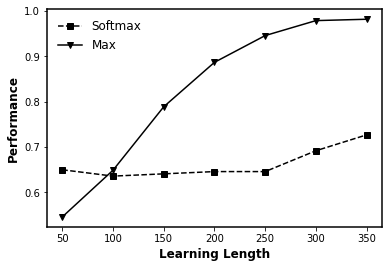

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import pickle
legend_properties = {'weight':'bold'}

data_folder = r"E:\data\hai-0307\Fang2009_5"
performance_softmax_file = data_folder + r"\high_softmax_across_learning_length"
performance_max_file = data_folder + r"\high_max_across_learning_length"

with open(performance_softmax_file, 'rb') as infile:
    softmax_performance = pickle.load(infile)
with open(performance_max_file, 'rb') as infile:
    max_performance = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_performance)
print("Max: ", max_performance)
# Performance
x =  [50, 100, 150, 200, 250, 300, 350]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, softmax_performance, "k--s", label="Softmax")
plt.plot(x, max_performance, "k-v", label="Max")
plt.xlabel('Learning Length', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_max_performance.png", transparent=True, dpi=300)
plt.show()
plt.clf()

Softmax:  [0.996140625, 0.9965068359375, 0.996126953125, 0.99610546875, 0.996255859375, 0.9961416015625, 0.9962685546875, 0.99659375, 0.9960869140625]
Max:  [0.2924130859375, 0.6973203125, 0.89937890625, 0.9702587890625, 0.99087109375, 0.9961884765625, 0.997626953125]


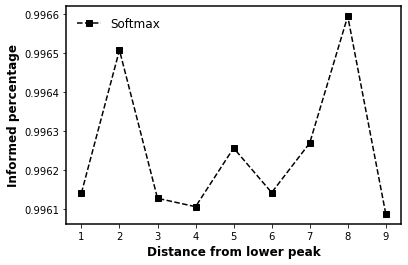

<Figure size 432x288 with 0 Axes>

In [12]:
data_folder = r"E:\data\hai-0307\Fang2009_5"
informed_softmax_file = data_folder + r"\informed_across_distance"

with open(informed_softmax_file, 'rb') as infile:
    softmax_informed = pickle.load(infile)

# for high, low in zip(high_peaks, low_peaks):
#     print(high + low)
print("Softmax: ", softmax_informed)
print("Max: ", max_informed)
# Performance
distance_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(distance_list, softmax_informed, "k--s", label="Softmax")
# plt.plot(distance_list, max_informed, "k-v", label="Max")
plt.xlabel('Distance from lower peak', fontweight='bold', fontsize=12)
plt.ylabel('Informed percentage', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\Softmax_max_informed.png", transparent=True, dpi=300)
plt.show()
plt.clf()